In [65]:
using PolynomialRoots
using Plots
using LaTeXStrings

In [29]:
function clean_up(array)
    # Clean up resulting array of roots
    # Discard numerical errors (norm > 2) and spit out unique different roots
    x = vec(array)
    xclean = zeros(ComplexF64,0)
    for entry in x
        if abs2(entry) < 100 #? When is it a numerical error?
            append!(xclean, entry)
        end
    end
    return unique(xclean)
end

clean_up (generic function with 1 method)

In [30]:
function filter_reals(array)
    # Only give back real roots
    real_roots = zeros(Float64, 0)
    for entry in array
        if imag(entry) == 0
            append!(real_roots, entry)
        end
    end
    return real_roots
end

filter_reals (generic function with 1 method)

In [5]:
function sample_algebraic_integer(iter, degree, height)
    # Sample 'iter' many roots of a polynomial of 'degree'th degree and height 'Q'
    # The polynomial is of the form x^n + a_{n-1}x^{n-1} + ... + a_1 x + a_0
    # degree = n
    # Leading coefficient is always 1
    # Height is max_i |a_i| of the coefficients.
    raw_roots_deg = zeros(ComplexF64, degree,iter)
    for i in 1:iter
        randomcoeff = [rand(collect(-height:height),degree);1] # First coefficient is always one, note order in PolynomialRoots!
        root_buffer = roots(randomcoeff)
        for j in 1:degree
            raw_roots_deg[j,i]=root_buffer[j]
        end
    end
    return clean_up(raw_roots_deg)
end

sample_algebraic_integer (generic function with 1 method)

In [6]:
function naive_scaling(n_array)
    return [n*3^n for n in n_array]
end

naive_scaling (generic function with 1 method)

In [44]:
height = 1
degree = 20
for i in 1:10
    println([rand(collect(-height:height),degree);1])
end

[0, 0, 0, -1, 0, -1, -1, 1, -1, 1, -1, -1, -1, -1, 0, -1, 1, 0, 0, 1, 1]
[1, 1, -1, 1, 0, -1, -1, 1, -1, 0, -1, -1, -1, 0, -1, -1, 0, -1, 0, 0, 1]
[0, 1, 0, -1, -1, 0, -1, 1, 0, 0, 1, -1, -1, 0, -1, -1, 0, -1, -1, 1, 1]
[-1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, -1, 1]
[0, 1, 1, 1, 1, 1, 0, 0, 0, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 0, 1]
[-1, -1, -1, 0, 0, -1, 1, 0, -1, 1, 0, -1, -1, 1, 0, 0, 0, -1, 0, -1, 1]
[-1, 0, -1, -1, 0, -1, -1, -1, 0, -1, 0, -1, 0, -1, 1, -1, -1, 1, 0, 0, 1]
[1, 0, -1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, -1, 0, -1, 0, 0, 1, 1]
[1, -1, 1, -1, -1, -1, 1, 1, 0, -1, 0, 1, 1, 1, -1, 0, 1, 0, 0, 0, 1]
[-1, 0, 0, 1, 1, 1, 0, -1, -1, -1, 0, 1, 0, 0, -1, 1, 1, -1, 0, -1, 1]


In [46]:
clean_up(roots([0, 0, 0, -1, 0, -1, -1, 1, -1, 1, -1, -1, -1, -1, 0, -1, 1, 0, 0, 1, 1]))

18-element Array{Complex{Float64},1}:
  -1.2287337756898968 + 0.6849777824160014im
   0.8343727992829751 - 0.3674006621666441im
  -0.6529003963419381 - 0.8060962163203718im
  0.17651256923141612 + 0.9212943147354459im
   -1.228733775689897 - 0.6849777824160013im
   0.7132157296738835 - 0.8291138923118867im
   0.7132157296738835 + 0.8291138923118867im
   1.1108252604655544 + 1.4206124918215083e-16im
 -0.20020065694611672 + 0.8880512687079761im
  -0.8363199932867178 - 4.4134944708826083e-17im
 -0.20020065694611677 - 0.8880512687079759im
  -0.6529003963419381 + 0.8060962163203717im
   0.8343727992829749 + 0.367400662166644im
  0.17651256923141603 - 0.9212943147354459im
   0.2204810972002589 - 0.805378220664392im
  0.22048109720025874 + 0.8053782206643919im
                 -1.0 - 9.62964972193618e-34im
                  0.0 + 0.0im

# Simulating AlgInts

In [7]:
# aint_{degree}_{height}
aints_2_1 = sample_algebraic_integer(30, 2, 1)
aints_2_2 = sample_algebraic_integer(100, 2, 2)
aints_2_3 = sample_algebraic_integer(300, 2, 3)
aints_2_4 = sample_algebraic_integer(2000, 2, 4);

In [18]:
# aint_{degree}_{height}
aints_10_1 = sample_algebraic_integer(100000, 10, 1)
aints_10_2 = sample_algebraic_integer(100000, 10, 2)
aints_10_3 = sample_algebraic_integer(100000, 10, 3)
aints_10_4 = sample_algebraic_integer(100000, 10, 4);

In [22]:
aints_20_1 = sample_algebraic_integer(500000, 20, 1)
aints_20_4 = sample_algebraic_integer(500000, 20, 4);

## Plotting distribution in the complex plane

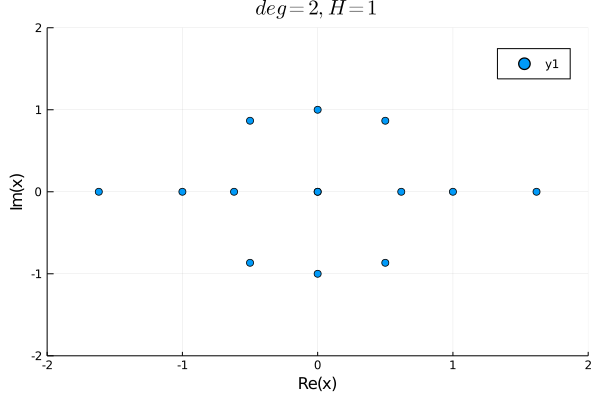

In [10]:
#histogram2d(aints_2_1,bins=(100,50),normed=true,xlim=(-2,2),ylim=(-2,2),title=L"deg=2,H=1")
scatter(aints_2_1,xlim=(-2,2),ylim=(-2,2),title=L"deg=2,H=1")

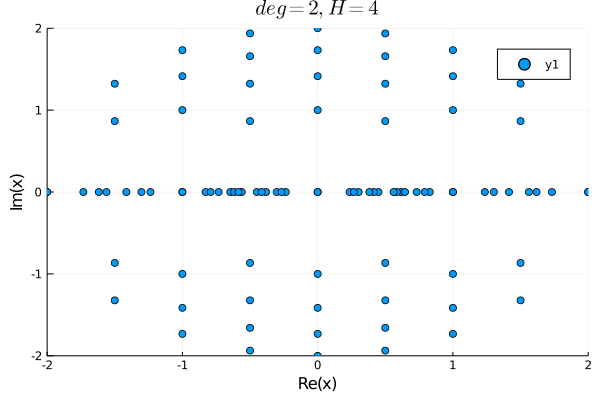

In [17]:
#histogram2d(aints_2_4,bins=(300,100),normed=true,xlim=(-2,2),ylim=(-2,2),title=L"deg=2,H=4")
scatter(aints_2_4,xlim=(-2,2),ylim=(-2,2),title=L"deg=2,H=4")

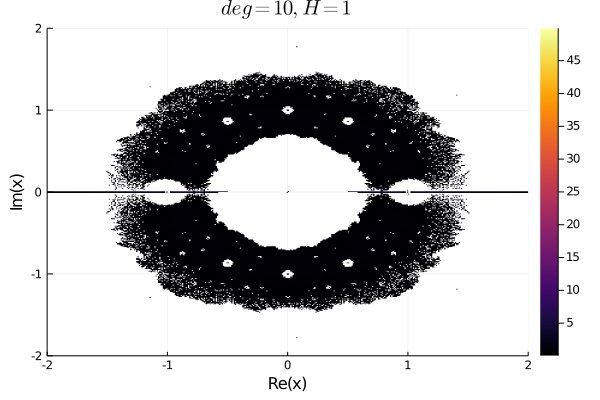

In [19]:
histogram2d(aints_10_1,bins=(500,500),xlim=(-2,2),ylim=(-2,2),normed=true,title=L"deg=10,H=1")

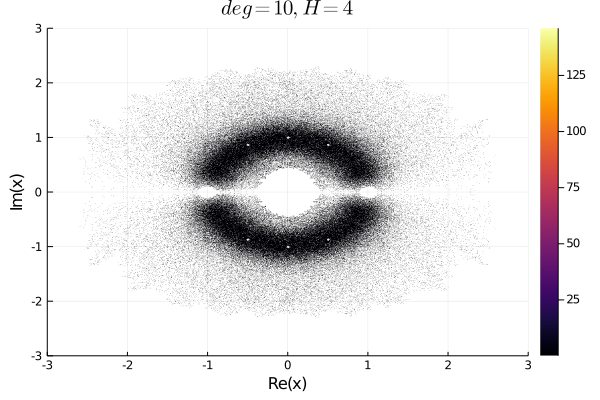

In [20]:
histogram2d(aints_10_4,bins=(3000,3000),xlim=(-3,3),ylim=(-3,3),normed=true,title=L"deg=10,H=4")

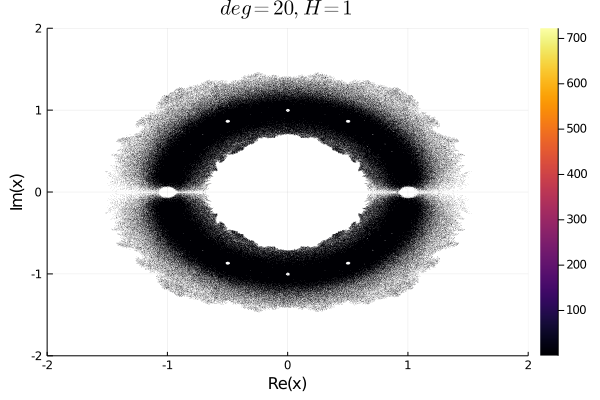

In [23]:
histogram2d(aints_20_1,bins=(3000,3000),xlim=(-2,2),ylim=(-2,2),normed=true,title=L"deg=20,H=1")

In [24]:
savefig("aints_deg_20_H1.pdf")

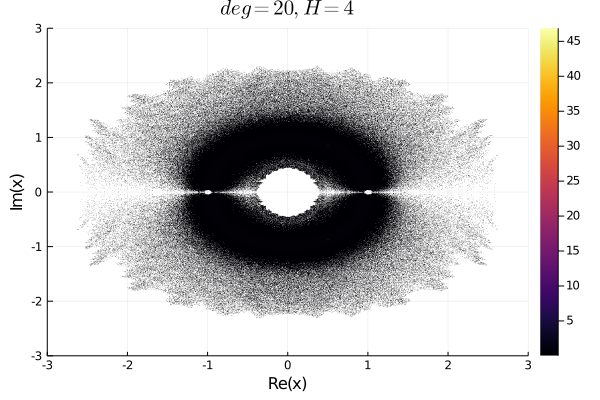

In [26]:
histogram2d(aints_20_4,bins=(3000,3000),xlim=(-3,3),ylim=(-3,3),normed=true,title=L"deg=20,H=4")

## Histogram of radial distribution in complex plane

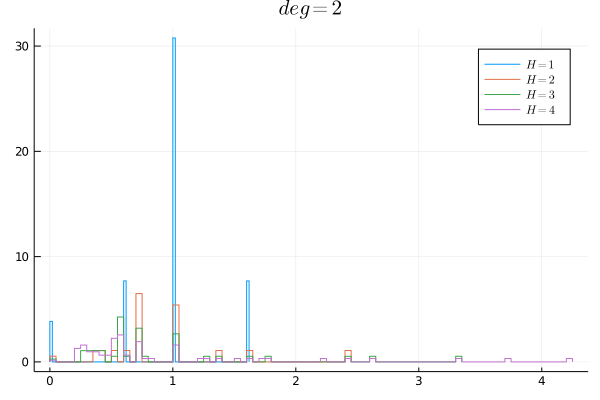

In [166]:
plot([abs(r) for r in aints_2_1],bins=(100),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=2")
plot!([abs(r) for r in aints_2_2],bins=(100),normed=true,seriestype = :stephist,label=L"H=2")
plot!([abs(r) for r in aints_2_3],bins=(100),normed=true,seriestype = :stephist,label=L"H=3")
plot!([abs(r) for r in aints_2_4],bins=(100),normed=true, seriestype= :stephist,label=L"H=4")


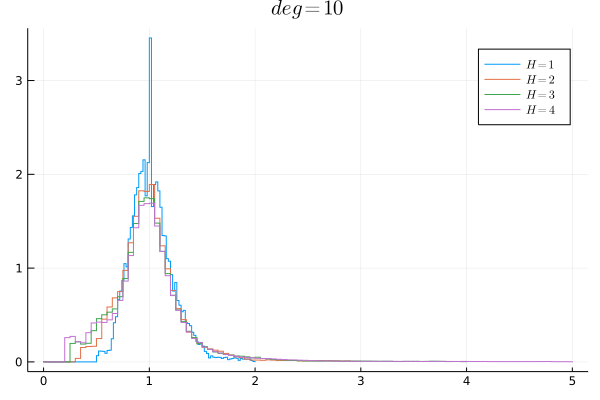

In [167]:
plot([abs(r) for r in aints_10_1],bins=(100),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=10")
plot!([abs(r) for r in aints_10_2],bins=(100),normed=true,seriestype = :stephist,label=L"H=2")
plot!([abs(r) for r in aints_10_3],bins=(100),normed=true,seriestype = :stephist,label=L"H=3")
plot!([abs(r) for r in aints_10_4],bins=(100),normed=true, seriestype= :stephist,label=L"H=4")

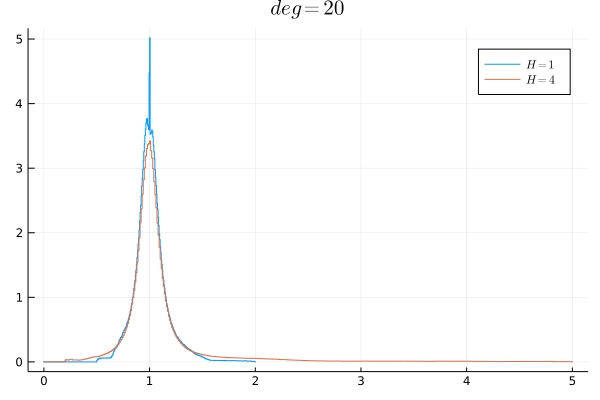

In [27]:
plot([abs(r) for r in aints_20_1],bins=(500),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=20")
plot!([abs(r) for r in aints_20_4],bins=(500),normed=true, seriestype= :stephist,label=L"H=4")

## Angular distribution in complex plane

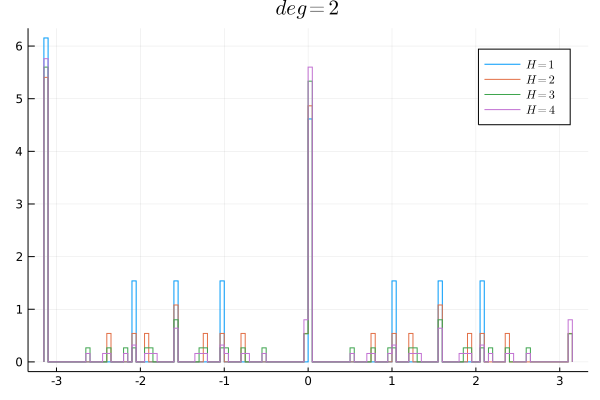

In [170]:
plot([angle(r) for r in aints_2_1],bins=(200),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=2")
plot!([angle(r) for r in aints_2_2],bins=(200),normed=true,seriestype = :stephist,label=L"H=2")
plot!([angle(r) for r in aints_2_3],bins=(200),normed=true,seriestype = :stephist,label=L"H=3")
plot!([angle(r) for r in aints_2_4],bins=(200),normed=true, seriestype= :stephist,label=L"H=4")

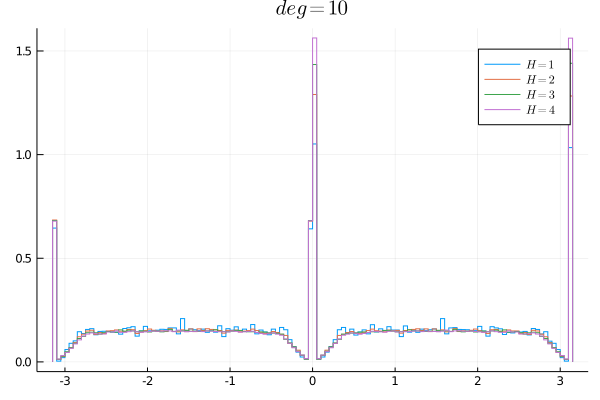

In [169]:
plot([angle(r) for r in aints_10_1],bins=(200),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=10")
plot!([angle(r) for r in aints_10_2],bins=(200),normed=true,seriestype = :stephist,label=L"H=2")
plot!([angle(r) for r in aints_10_3],bins=(200),normed=true,seriestype = :stephist,label=L"H=3")
plot!([angle(r) for r in aints_10_4],bins=(200),normed=true, seriestype= :stephist,label=L"H=4")

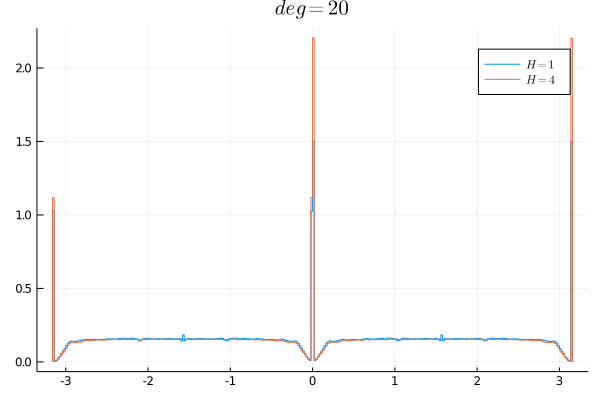

In [177]:
plot([angle(r) for r in aints_20_1],bins=(500),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=20")
plot!([angle(r) for r in aints_20_4],bins=(500),normed=true, seriestype= :stephist,label=L"H=4")

## Distribution of purely real roots

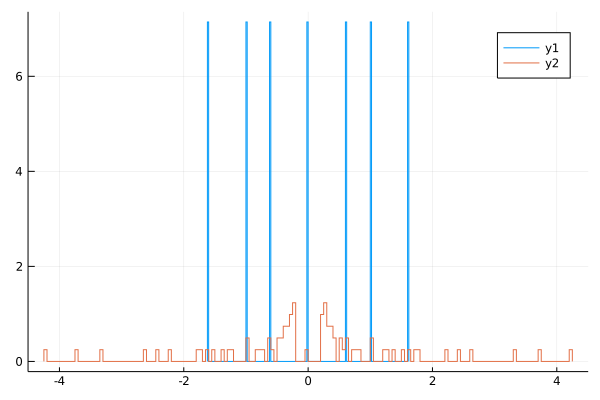

In [187]:
plot(filter_reals(aints_2_1),normed=true,bins=(250),seriestype = :stephist)
plot!(filter_reals(aints_2_4),normed=true,bins=(250),seriestype = :stephist)

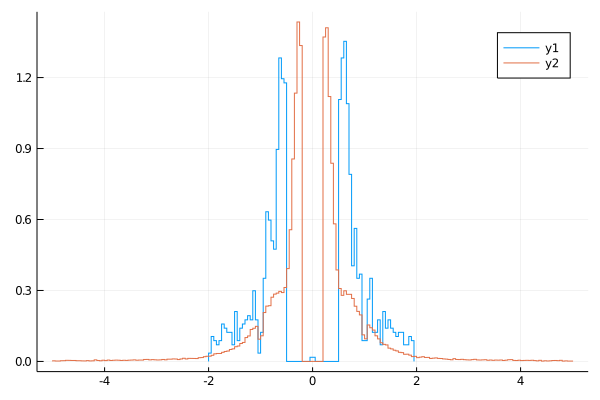

In [190]:
plot(filter_reals(aints_10_1),normed=true,bins=(100),seriestype = :stephist)
plot!(filter_reals(aints_10_4),normed=true,bins=(250),seriestype = :stephist)

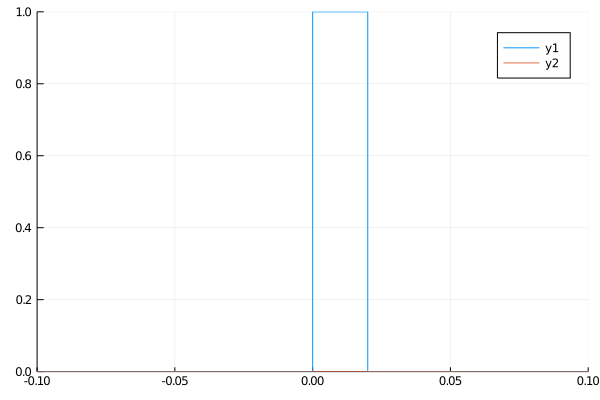

In [50]:
plot(filter_reals(aints_20_1),normed=false,bins=(250),seriestype = :stephist,xlim=(-0.1,0.1),ylim=(0,1))
plot!(filter_reals(aints_20_4),normed=true,bins=(250),seriestype = :stephist)

## Holes on the unit circle

In [213]:
function filter_unit_roots(array)
    # Only give back real roots
    unit_roots = zeros(Float64, 0)
    for entry in array
        if (abs2(entry) >0.99) & (abs2(entry) < 1.01) # Compromise
            append!(unit_roots, angle(entry))
        end
    end
    return unit_roots
end

filter_unit_roots (generic function with 1 method)

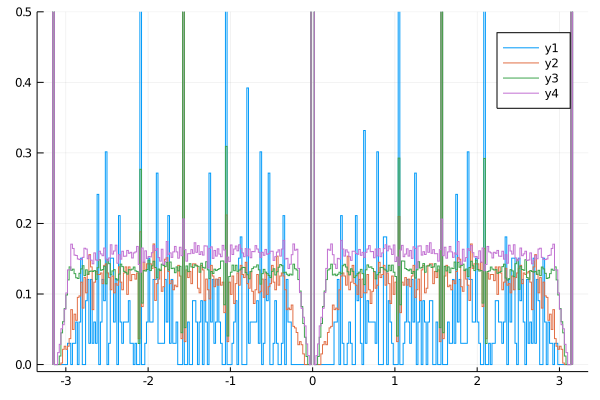

In [214]:

00),seriestype = :stephist,ylim=(-0.01,0.5))
plot!(filter_unit_roots(aints_10_4),normed=true,bins=(500),seriestype = :stephist)
plot!(filter_unit_roots(aints_20_1),normed=true,bins=(500),seriestype = :stephist)
plot!(filter_unit_roots(aints_20_4),normed=true,bins=(500),seriestype = :stephist)